<a href="https://colab.research.google.com/github/racndk/ML-Weather-Prediction/blob/main/Weather_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
df = pd.read_csv(r"D:\OneDrive\Documents\Kuliah\AoL\Jawaban\Semester 4\Machine learning\climate_data.csv")
df2 = df.copy()
df.shape

(589265, 12)

In [ ]:
df.describe()

,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,station_id
count,565882.000000,551529.000000,544160.000000,541083.000000,463881.000000,545544.000000,579051.000000,576137.000000,579138.000000,589265.000000
mean,23.312111,31.528955,26.855475,82.489365,8.680760,5.083199,4.709601,188.488325,1.956680,96832.949230
std,2.280687,2.311659,1.939656,14.337669,17.928752,3.261586,2.612285,107.657452,1.803358,542.419161
min,0.000000,0.000000,0.000000,24.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,96001.000000
25%,23.000000,30.500000,26.200000,79.000000,0.000000,2.500000,3.000000,90.000000,1.000000,96293.000000
50%,24.000000,31.800000,27.200000,83.000000,1.000000,5.300000,4.000000,180.000000,2.000000,96797.000000
75%,25.000000,33.000000,28.000000,87.000000,9.300000,7.600000,6.000000,270.000000,3.000000,97240.000000
max,246.000000,334.000000,141.600000,7520.000000,1965.500000,705.000000,185.000000,931.000000,160.000000,97980.000000


In [ ]:
df.isnull().sum()

date               0
Tn             23383
Tx             37736
Tavg           45105
RH_avg         48182
RR            125384
ss             43721
ff_x           10214
ddd_x          13128
ff_avg         10127
ddd_car        13739
station_id         0
dtype: int64

In [ ]:
df['date'] = pd.to_datetime(df['date'], dayfirst= True)
df['date'] = df['date'].dt.strftime('%Y-%m-%d')


In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589265 entries, 0 to 589264
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   date        589265 non-null  datetime64[ns]
 1   Tn          565882 non-null  float64       
 2   Tx          551529 non-null  float64       
 3   Tavg        544160 non-null  float64       
 4   RH_avg      541083 non-null  float64       
 5   RR          463881 non-null  float64       
 6   ss          545544 non-null  float64       
 7   ff_x        579051 non-null  float64       
 8   ddd_x       576137 non-null  float64       
 9   ff_avg      579138 non-null  float64       
 10  ddd_car     575526 non-null  object        
 11  station_id  589265 non-null  int64         
dtypes: datetime64[ns](1), float64(9), int64(1), object(1)
memory usage: 53.9+ MB


In [ ]:
df.dtypes

date          datetime64[ns]
Tn                   float64
Tx                   float64
Tavg                 float64
RH_avg               float64
RR                   float64
ss                   float64
ff_x                 float64
ddd_x                float64
ff_avg               float64
ddd_car               object
station_id             int64
dtype: object

In [ ]:
df.drop_duplicates(keep='first', inplace= True)

In [ ]:
df.shape

(589265, 12)

In [ ]:
df1 = df.drop(['date', 'station_id', 'ddd_car'], axis = 1)

<Axes: >

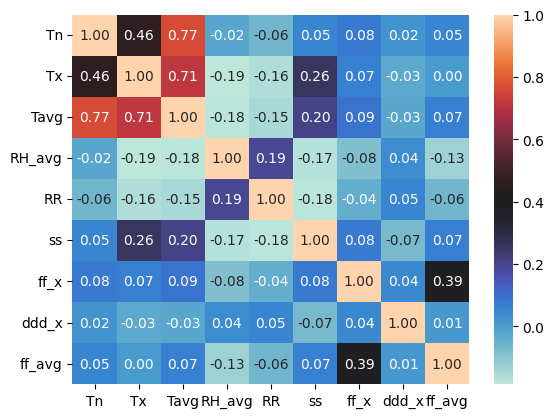

In [ ]:
# Heatmap
data_heatmap = df1.corr()
sns.heatmap(data_heatmap, annot=True, fmt=".2f", cmap="icefire")

<Axes: xlabel='ff_avg', ylabel='ss'>

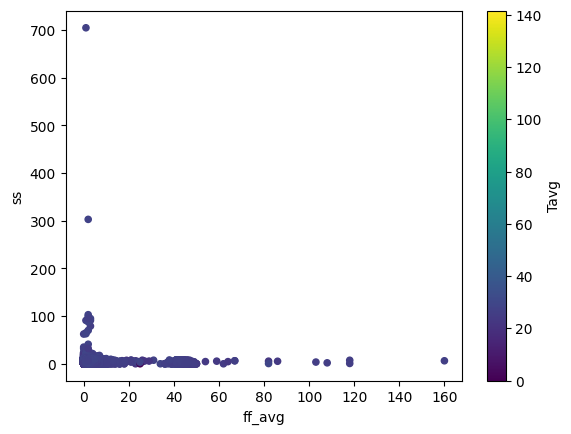

In [ ]:
df1.plot.scatter(x = 'ff_avg', y = 'ss', c = 'Tavg')

In [ ]:
df.dropna()

,date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,station_id
0,2010-01-01,21.4,30.2,27.1,82.0,9.0,0.5,7.0,90.0,5.0,E,96001
1,2010-01-02,21.0,29.6,25.7,95.0,24.0,0.2,6.0,90.0,4.0,E,96001
2,2010-01-03,20.2,26.8,24.5,98.0,63.0,0.0,5.0,90.0,4.0,E,96001
3,2010-01-04,21.0,29.2,25.8,90.0,0.0,0.1,4.0,225.0,3.0,SW,96001
7,2010-01-08,21.8,29.8,26.8,91.0,3.0,0.6,5.0,90.0,4.0,E,96001
...,...,...,...,...,...,...,...,...,...,...,...,...
589258,2020-12-25,24.4,31.7,28.2,84.0,8.5,6.0,5.0,200.0,3.0,SW,97980
589259,2020-12-26,24.0,31.8,27.6,81.0,1.5,8.1,3.0,140.0,1.0,C,97980
589260,2020-12-27,25.2,31.2,29.2,74.0,0.0,1.4,4.0,280.0,2.0,C,97980
589263,2020-12-30,25.2,32.6,28.4,80.0,0.0,2.4,7.0,260.0,2.0,C,97980


In [ ]:
df.columns

Index(['date', 'Tn', 'Tx', 'Tavg', 'RH_avg', 'RR', 'ss', 'ff_x', 'ddd_x',
       'ff_avg', 'ddd_car', 'station_id'],
      dtype='object')

In [ ]:
dfclean = df.drop(['date','ss', 'ff_x', 'ddd_x', 'ddd_car', 'station_id'], axis = 1)

In [ ]:
dfclean.shape

(589265, 6)

In [ ]:
dfclean.dtypes

Tn        float64
Tx        float64
Tavg      float64
RH_avg    float64
RR        float64
ff_avg    float64
dtype: object

In [ ]:
dfclean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589265 entries, 0 to 589264
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Tn      565882 non-null  float64
 1   Tx      551529 non-null  float64
 2   Tavg    544160 non-null  float64
 3   RH_avg  541083 non-null  float64
 4   RR      463881 non-null  float64
 5   ff_avg  579138 non-null  float64
dtypes: float64(6)
memory usage: 27.0 MB


# mencari missing value

In [ ]:
null_pct1 = dfclean.apply(pd.isnull).sum()/dfclean.shape[0]

In [ ]:
null_pct1

Tn        0.039682
Tx        0.064039
Tavg      0.076545
RH_avg    0.081766
RR        0.212780
ff_avg    0.017186
dtype: float64

In [ ]:
dfclean = dfclean.dropna()

In [ ]:
dfclean.isnull().sum()

Tn        0
Tx        0
Tavg      0
RH_avg    0
RR        0
ff_avg    0
dtype: int64

In [ ]:
dfclean['RR'] = dfclean['RR'].astype(float)

In [ ]:
dfclean.shape

(399468, 6)

In [ ]:
dfclean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 399468 entries, 0 to 589264
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Tn      399468 non-null  float64
 1   Tx      399468 non-null  float64
 2   Tavg    399468 non-null  float64
 3   RH_avg  399468 non-null  float64
 4   RR      399468 non-null  float64
 5   ff_avg  399468 non-null  float64
dtypes: float64(6)
memory usage: 21.3 MB


In [ ]:
dfclean[dfclean['Tn']==dfclean['Tn'].max()]

,Tn,Tx,Tavg,RH_avg,RR,ff_avg
47088,92.0,33.1,26.8,89.0,1.0,1.0


In [ ]:
# #limit data yang terlalu besar
dfclean = dfclean[dfclean.Tn <= 43]
dfclean = dfclean[dfclean.Tx <= 52]
dfclean = dfclean[dfclean.Tavg <= 52]
dfclean = dfclean[dfclean.ff_avg <= 100]
dfclean = dfclean[dfclean.RH_avg <= 1000]
# dfclean = dfclean[dfclean.target <= 52]
dfclean = dfclean[dfclean.RR >= 0]

<Axes: xlabel='Tn', ylabel='RH_avg'>

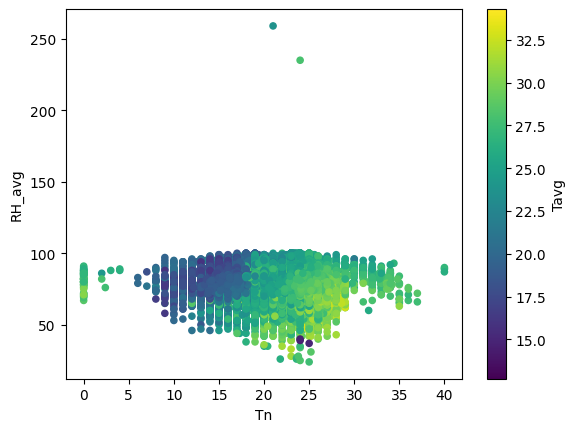

In [ ]:
dfclean.plot.scatter(x = 'Tn', y = 'RH_avg', c = 'Tavg')

<Axes: xlabel='ff_avg', ylabel='Tx'>

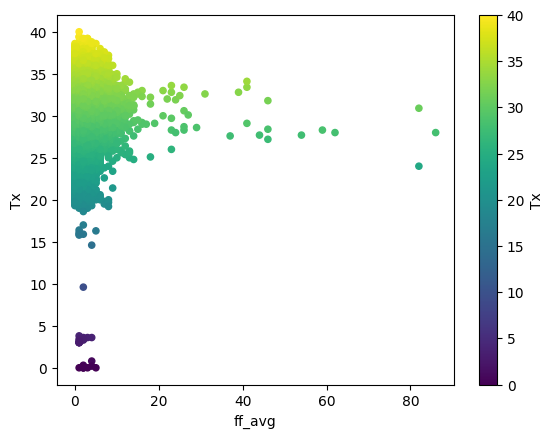

In [ ]:
dfclean.plot.scatter(x = 'ff_avg', y = 'Tx', c = 'Tx')

In [ ]:
#replacing rainfall number that is greater than 1 to 1, while leaving 0 as 0
dfclean['RR'] = df['RR'].apply(lambda x: 1 if x >= 0.01 else x)
dfclean['RR'] = dfclean['RR'].fillna(0).astype(int)

In [ ]:
null_pct1 = dfclean.apply(pd.isnull).sum()/dfclean.shape[0]
null_pct1

Tn        0.0
Tx        0.0
Tavg      0.0
RH_avg    0.0
RR        0.0
ff_avg    0.0
dtype: float64

In [ ]:
dfclean['RR'].unique()

array([1, 0])

<Axes: >

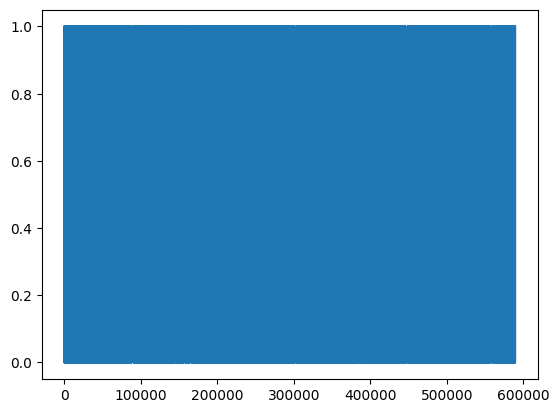

In [ ]:
dfclean['RR'].plot()

# Model building

In [ ]:
dfclean['RR'].astype(float)

0         1.0
1         1.0
2         1.0
3         0.0
7         1.0
         ... 
589258    1.0
589259    1.0
589260    0.0
589263    0.0
589264    1.0
Name: RR, Length: 399448, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
df_copy = dfclean.copy()
print(df_copy.head(), '\n')

y = dfclean['RR'].astype(float)
X = dfclean.drop(['RR'], axis = 1)
print(X.head(), '\n')
print(y.head())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 32)

     Tn    Tx  Tavg  RH_avg  RR  ff_avg
0  21.4  30.2  27.1    82.0   1     5.0
1  21.0  29.6  25.7    95.0   1     4.0
2  20.2  26.8  24.5    98.0   1     4.0
3  21.0  29.2  25.8    90.0   0     3.0
7  21.8  29.8  26.8    91.0   1     4.0 

     Tn    Tx  Tavg  RH_avg  ff_avg
0  21.4  30.2  27.1    82.0     5.0
1  21.0  29.6  25.7    95.0     4.0
2  20.2  26.8  24.5    98.0     4.0
3  21.0  29.2  25.8    90.0     3.0
7  21.8  29.8  26.8    91.0     4.0 

0    1.0
1    1.0
2    1.0
3    0.0
7    1.0
Name: RR, dtype: float64


Data standardization

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler(feature_range=(0,1))
X_train_ntemp = scale.fit_transform(X_train['Tn'].values.reshape(-1,1))
X_test_ntemp = scale.transform(X_test['Tn'].values.reshape(-1,1))
print(X_train_ntemp.shape)
print(X_test_ntemp.shape)
print(y_train.shape)
print(y_test.shape)

(319558, 1)
(79890, 1)
(319558,)
(79890,)


In [ ]:
X_train_xtemp = scale.fit_transform(X_train['Tx'].values.reshape(-1,1))
X_test_xtemp = scale.transform(X_test['Tx'].values.reshape(-1,1))
print(X_train_xtemp.shape)
print(X_test_xtemp.shape)
print(y_train.shape)
print(y_test.shape)

(319558, 1)
(79890, 1)
(319558,)
(79890,)


In [ ]:
X_train_avgtemp = scale.fit_transform(X_train['Tavg'].values.reshape(-1,1))
X_test_avgtemp = scale.transform(X_test['Tavg'].values.reshape(-1,1))
print(X_train_avgtemp.shape)
print(X_test_avgtemp.shape)
print(y_train.shape)
print(y_test.shape)

(319558, 1)
(79890, 1)
(319558,)
(79890,)


In [ ]:
X_train_humid = scale.fit_transform(X_train['RH_avg'].values.reshape(-1,1))
X_test_humid = scale.transform(X_test['RH_avg'].values.reshape(-1,1))
print(X_train_humid.shape)
print(X_test_humid.shape)
print(y_train.shape)
print(y_test.shape)

(319558, 1)
(79890, 1)
(319558,)
(79890,)


In [ ]:
X_train_wind = scale.fit_transform(X_train['ff_avg'].values.reshape(-1,1))
X_test_wind = scale.transform(X_test['ff_avg'].values.reshape(-1,1))
print(X_train_wind.shape)
print(X_test_wind.shape)
print(y_train.shape)
print(y_test.shape)

(319558, 1)
(79890, 1)
(319558,)
(79890,)


In [ ]:
from scipy.sparse import hstack
import scipy.sparse as sp

train = hstack((sp.csr_matrix(X_train_ntemp), sp.csr_matrix(X_train_xtemp), sp.csr_matrix(X_train_avgtemp), X_train_humid, X_train_wind), dtype= float)
test = hstack((sp.csr_matrix(X_test_ntemp), sp.csr_matrix(X_test_xtemp), sp.csr_matrix(X_test_avgtemp), X_test_humid, X_test_wind),dtype= float)

train = train.toarray() #X_train
test = test.toarray() #Y_train
y_train = y_train.astype(float)
y_train = y_train.astype(float)
print(train.shape)
print(test.shape)
print(y_train.shape)
print(y_test.shape)

(319558, 5)
(79890, 5)
(319558,)
(79890,)


In [ ]:
import keras as k
import tensorflow as tf
from tensorflow.keras import layers
from keras.models  import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error
from keras.metrics import categorical_crossentropy
import numpy as np

In [ ]:
input_shape = train.shape[1:]
model = Sequential([
    Dense(32, input_shape = input_shape, activation = 'relu'),
    Dense(64, activation = 'relu'),
    layers.Dropout(0.25),
    layers.Flatten(),
    Dense(128, activation = 'softmax'),
])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                192       
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
Total params: 10,624
Trainable params: 10,624
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(
    optimizer='adam',
    loss= k.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics= ['accuracy'])


In [ ]:
history = model.fit(train, y_train, epochs= 10, shuffle = False, verbose = 1)

Epoch 1/10
9987/9987 [==============================] - 14s 1ms/step - loss: 0.6164 - accuracy: 0.6809
Epoch 2/10
9987/9987 [==============================] - 13s 1ms/step - loss: 0.5658 - accuracy: 0.7085
Epoch 3/10
9987/9987 [==============================] - 13s 1ms/step - loss: 0.5625 - accuracy: 0.7110
Epoch 4/10
9987/9987 [==============================] - 13s 1ms/step - loss: 0.5605 - accuracy: 0.7123
Epoch 5/10
9987/9987 [==============================] - 13s 1ms/step - loss: 0.5591 - accuracy: 0.7127
Epoch 6/10
9987/9987 [==============================] - 14s 1ms/step - loss: 0.5579 - accuracy: 0.7139
Epoch 7/10
9987/9987 [==============================] - 14s 1ms/step - loss: 0.5574 - accuracy: 0.7138
Epoch 8/10
9987/9987 [==============================] - 14s 1ms/step - loss: 0.5571 - accuracy: 0.7138
Epoch 9/10
9987/9987 [==============================] - 14s 1ms/step - loss: 0.5564 - accuracy: 0.7145
Epoch 10/10
9987/9987 [==============================] - 14s 1ms/step - l

In [ ]:
results = model.evaluate(test, y_test, batch_size= 32)

2497/2497 [==============================] - 3s 1ms/step - loss: 0.5522 - accuracy: 0.7146


In [ ]:
ypred_train_rnn = model.predict(train)
ypred_test_rnn = model.predict(test)

2497/2497 [==============================] - 3s 1ms/step


In [ ]:
ypred_train_rnn = np.round(ypred_train_rnn)
ypred_test_rnn = np.round(ypred_test_rnn)


In [ ]:
train_scores_Dt, test_scores_Dt = list(), list()
train_scores_KNN, test_scores_KNN = list(), list()

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

In [ ]:
# Membangun model Decision Tree
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier()


model_dt.fit(train, y_train)
#fit model on the training dataset
ypred_dt_train = model_dt.predict(train)
train_acc_dt = mean_absolute_error(y_train, ypred_dt_train)
train_scores_Dt.append(train_acc_dt)
# evaluate on the test dataset
ypred_dt_test = model_dt.predict(test)
test_acc_dt = mean_absolute_error(y_test, ypred_dt_test)
test_scores_Dt.append(test_acc_dt)

print(classification_report(y_train, ypred_dt_train))
print(classification_report(y_test, ypred_dt_test))

[0. 1. 1. ... 1. 0. 0.]
              precision    recall  f1-score   support

         0.0       0.90      0.94      0.92    135530
         1.0       0.96      0.92      0.94    184028

    accuracy                           0.93    319558
   macro avg       0.93      0.93      0.93    319558
weighted avg       0.93      0.93      0.93    319558

              precision    recall  f1-score   support

         0.0       0.56      0.60      0.58     33842
         1.0       0.69      0.66      0.68     46048

    accuracy                           0.63     79890
   macro avg       0.63      0.63      0.63     79890
weighted avg       0.64      0.63      0.64     79890



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(train, y_train)
#Train
ypred_knn_train = model_knn.predict(train)
print(classification_report(y_train, ypred_knn_train))
acc_score_KNN_train = accuracy_score(y_train, ypred_knn_train*100)


#Test
ypred_knn_test = model_knn.predict(test)
print(classification_report(y_test, ypred_knn_test))
acc_score_KNN_test = accuracy_score(y_test, ypred_knn_test)*100

              precision    recall  f1-score   support

         0.0       0.76      0.70      0.73    135530
         1.0       0.79      0.84      0.81    184028

    accuracy                           0.78    319558
   macro avg       0.78      0.77      0.77    319558
weighted avg       0.78      0.78      0.78    319558

              precision    recall  f1-score   support

         0.0       0.64      0.59      0.61     33842
         1.0       0.72      0.75      0.73     46048

    accuracy                           0.69     79890
   macro avg       0.68      0.67      0.67     79890
weighted avg       0.68      0.69      0.68     79890



In [ ]:
train_scores_KNN, test_scores_KNN

([0.2968913311511525], [68.51420703467267])

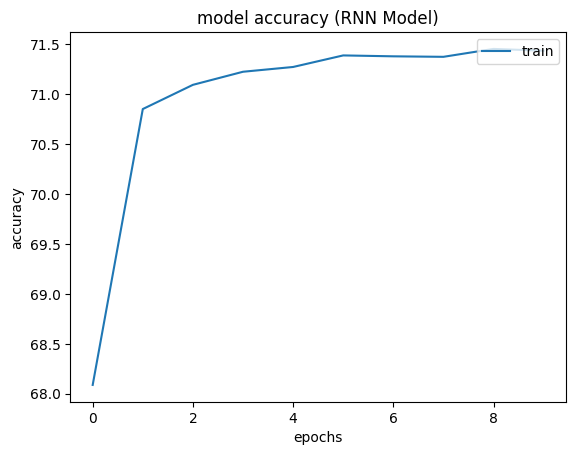

In [ ]:
metrics = history.history
plt.plot(history.epoch, np.array(metrics['accuracy'])*100)
plt.title('model accuracy (RNN Model)')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train'], loc = 'upper right')
plt.show()

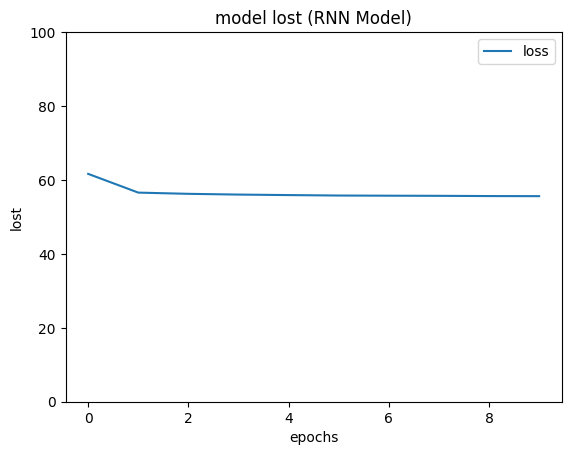

In [ ]:
plt.ylim([0,100])
plt.plot(history.epoch, np.array(metrics['loss'])*100)
plt.title('model lost (RNN Model)')
plt.ylabel('lost')
plt.xlabel('epochs')
plt.legend(['loss'], loc = 'upper right')
plt.show()

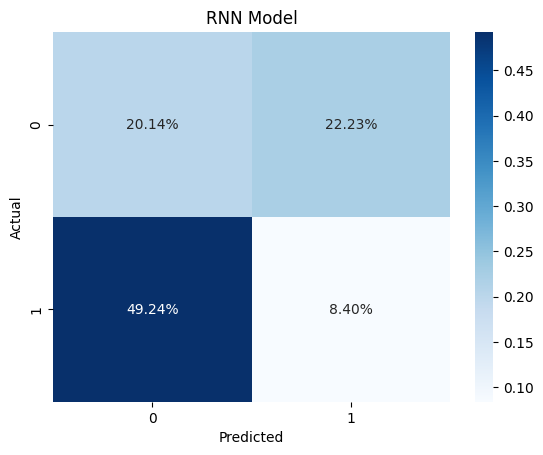

In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, ypred_test_rnn[:, 0])

sns.heatmap(conf_matrix/np.sum(conf_matrix), annot=True, fmt ='.2%',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('RNN Model')
plt.show()

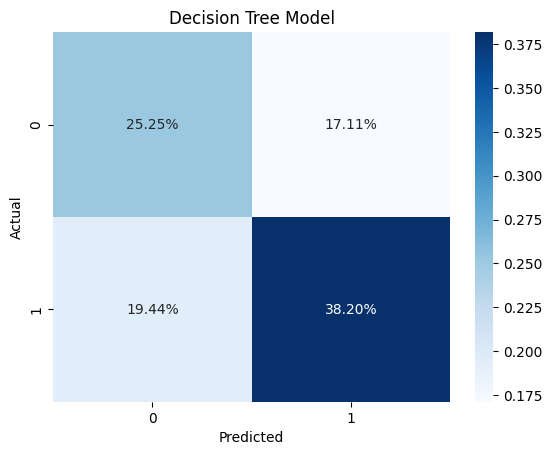

In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, ypred_dt_test)

sns.heatmap(conf_matrix/np.sum(conf_matrix), annot=True, fmt ='.2%',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Model')
plt.show()

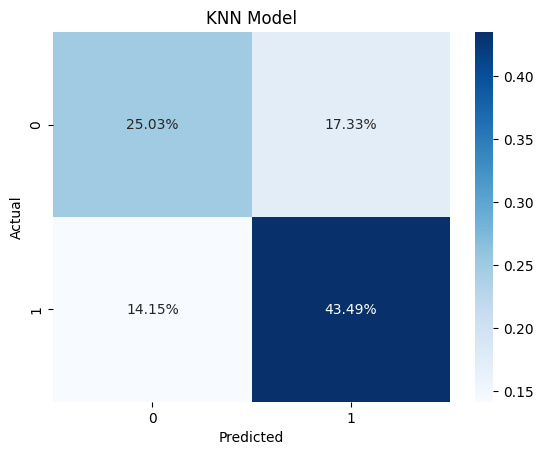

In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, ypred_knn_test)

sns.heatmap(conf_matrix/np.sum(conf_matrix), annot=True, fmt ='.2%',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('KNN Model')
plt.show()

In [ ]:
# from keras.layers import Dropout
# from keras.layers import BatchNormalization

# modeld = Sequential()
# modeld.add(Dropout(0.2, input_shape = (5,)))
# modeld.add(Dense(16, activation = 'relu'))
# modeld.add(Dropout(0.2))
# modeld.add(BatchNormalization())
# modeld.add(Dense(32, activation = 'relu' ))
# modeld.add(Dense(2, activation= 'softmax'))

In [ ]:
# def plot_roc_cur(fper, tper):
#     plt.plot(fper, tper, color='orange', label='ROC')
#     plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.title('Receiver Operating Characteristic (ROC) Curve')
#     plt.legend()
#     plt.show()

In [ ]:
# import time
# from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, confusion_matrix, roc_curve, classification_report
# def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
#     t0=time.time()
#     if verbose == False:
#         model.fit(X_train,y_train, verbose=0)
#     else:
#         model.fit(X_train,y_train)
#     y_pred = model.predict(X_test)
#     accuracy = accuracy_score(y_test, y_pred)
#     roc_auc = roc_auc_score(y_test, y_pred)
#     coh_kap = cohen_kappa_score(y_test, y_pred)
#     time_taken = time.time()-t0
#     print("Accuracy = {}".format(accuracy))
#     print("ROC Area under Curve = {}".format(roc_auc))
#     print("Cohen's Kappa = {}".format(coh_kap))
#     print("Time taken = {}".format(time_taken))
#     print(classification_report(y_test,y_pred,digits=5))

#     probs = model.predict_proba(X_test)
#     probs = probs[:, 1]
#     fper, tper, thresholds = roc_curve(y_test, probs)
#     plot_roc_cur(fper, tper)

#     con = confusion_matrix(y_pred, y_test, normalize = 'all')
#     sns.heatmap(con, annot=True, cmap='Blues', fmt='g')
#     plt.xlabel('Predicted')
#     plt.ylabel('Actual')
#     plt.title('Confusion Matrix Model')
#     plt.show()


#     return model, accuracy, roc_auc, coh_kap, time_taken

In [ ]:
# from sklearn.neural_network import MLPClassifier

# params_nn = {'hidden_layer_sizes': (30,30,30),
#              'activation': 'logistic',
#              'solver': 'lbfgs',
#              'max_iter': 100}

# model_nn = MLPClassifier(**params_nn)
# model_nn, accuracy_nn, roc_auc_nn, coh_kap_nn, tt_nn = run_model(model_nn, train, y_train, test, y_test)

In [ ]:
# # Membangun model Decision Tree
# from sklearn.model_selection import train_test_split
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import accuracy_score

# model = DecisionTreeClassifier()

# # Melatih model
# history1= model.fit(train, y_train)

In [ ]:
# modeld.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics= ['accuracy'])
# modeld.summary()

In [ ]:
# history = modeld.fit(train, y_train, epochs= 250, shuffle = True, verbose = 2)